# Homework 8
**Do Not turn in homework early. We will plan to submit your pull requests at the beginning of class Tuesday. Early submissions will be penalized.**

## Problem 1. 25 Points
Create a class called `Client`. When a client object is instantiated, it should set two data attributes: `username` and `password`. Give this class a unique representation which only shows the username, but obfuscates the password by changing the actual password to all X's that have the same length as the original password. For instance when someone prints a client object, it should show something like:

`<Client username:benneely password:XXXXXX\>`

Where the original password had `6` letters.

In [2]:
# @hidden_cell
#Using Temporary Password for Homework Exercise
ag_username = 'avanigupta1'
ag_password = 'Bios2018'

In [3]:
class Client:
    """
    Class Client created to take client's username and password, 
    and return representation of said user with password obfuscated.
    """
    def __init__(self, username, password): 
        self.username = username
        self.password = password
        return
        
    def __repr__(self):
        return('<Client username:{} password:{}\>'.format(self.username, (str('X')*len(str(self.password)))))

#Test
Client(ag_username, ag_password)

<Client username:avanigupta1 password:XXXXXXXX\>

## Problem 2. 25 Points
Create a class `GitHubCaller`. This class should inherit from the Client class. GitHubCaller should have a data attribute named `base_url`. During instantiation, set this value to `https://api.github.com`. It should also have a property attribute called `endpoint`. During instantiation, set this value to `/orgs/bios821-2018`. Create a method for this class called `getit`. This method should `return` a python dictionary that is the result of an authenticated `GET` request to the endpoint. All other functionality (e.g. representation) should be handled by the `Client` class. 

In [8]:
import requests

class GitHubCaller(Client):
    """
    Class GitHubCaller inherits from Client.
    GitHubCaller class obtains username and password from Client class,
    and returns authenticated GET request from input API.
    At instantiation, API = https://api.github.com/orgs/bios821-2018
    """
    def __init__(self, username, password, base_url='https://api.github.com'): #inherit attributes from Client, setting base
        super().__init__(username, password)
        self.base_url = base_url
        self.endpoint = '/orgs/bios821-2018' #setting initial endpoint 
        return
    
    @property
    def endpoint(self):
        #print('Getting Endpoint')
        return self._endpoint
    
    
    @endpoint.setter
    def endpoint(self, value):
        print('Setting Endpoint')
        self._endpoint = value
        
    
    def getit(self):
        print('Getting Result of Authenticated GET Request For {}'.format(self.username))
        z = requests.get(self.base_url+self.endpoint, auth=(self.username,self.password)) #creating 'requests.get' string
        if z.status_code !=200: #error message if status code does not equal 200
            raise ValueError("Authentication Failed")
        else:
            self.getit = z
        return(z.json())
    
    def __repr__(self):
        return ('Dictionary for Endpoint{} from Username {} Created'.format(self._endpoint, self.username))
    
        
#Test
c = GitHubCaller(ag_username, ag_password) #setting GitHubCaller
print(c) #printing result of calling class
c.getit() #calling getit method to return dictionary

Setting Endpoint
Dictionary for Endpoint/orgs/bios821-2018 from Username avanigupta1 Created
Getting Result of Authenticated GET Request For avanigupta1


{'login': 'bios821-2018',
 'id': 43327426,
 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQzMzI3NDI2',
 'url': 'https://api.github.com/orgs/bios821-2018',
 'repos_url': 'https://api.github.com/orgs/bios821-2018/repos',
 'events_url': 'https://api.github.com/orgs/bios821-2018/events',
 'hooks_url': 'https://api.github.com/orgs/bios821-2018/hooks',
 'issues_url': 'https://api.github.com/orgs/bios821-2018/issues',
 'members_url': 'https://api.github.com/orgs/bios821-2018/members{/member}',
 'public_members_url': 'https://api.github.com/orgs/bios821-2018/public_members{/member}',
 'avatar_url': 'https://avatars2.githubusercontent.com/u/43327426?v=4',
 'description': '',
 'name': 'bios821',
 'company': None,
 'blog': '',
 'location': None,
 'email': '',
 'is_verified': False,
 'has_organization_projects': True,
 'has_repository_projects': True,
 'public_repos': 6,
 'public_gists': 0,
 'followers': 0,
 'following': 0,
 'html_url': 'https://github.com/bios821-2018',
 'created_at': '2018-09-17T01:49:43Z',

## Problem 3. 15 Points
Create an object from GitHubCaller and test 3 endpoints. You may need to search for the Github api documentation.

In [9]:
#Find All Pull Requests for Home_Work Repo

pullReq = GitHubCaller(ag_username, ag_password)
pullReq.endpoint = '/repos/bios821-2018/home_work/pulls'
print(pullReq)
pullReq.getit()

Setting Endpoint
Setting Endpoint
Dictionary for Endpoint/repos/bios821-2018/home_work/pulls from Username avanigupta1 Created
Getting Result of Authenticated GET Request For avanigupta1


[{'url': 'https://api.github.com/repos/bios821-2018/home_work/pulls/41',
  'id': 228403110,
  'node_id': 'MDExOlB1bGxSZXF1ZXN0MjI4NDAzMTEw',
  'html_url': 'https://github.com/bios821-2018/home_work/pull/41',
  'diff_url': 'https://github.com/bios821-2018/home_work/pull/41.diff',
  'patch_url': 'https://github.com/bios821-2018/home_work/pull/41.patch',
  'issue_url': 'https://api.github.com/repos/bios821-2018/home_work/issues/41',
  'number': 41,
  'state': 'open',
  'locked': False,
  'title': 'Dannys bios821 branch',
  'user': {'login': 'drwitt',
   'id': 42945653,
   'node_id': 'MDQ6VXNlcjQyOTQ1NjUz',
   'avatar_url': 'https://avatars1.githubusercontent.com/u/42945653?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/drwitt',
   'html_url': 'https://github.com/drwitt',
   'followers_url': 'https://api.github.com/users/drwitt/followers',
   'following_url': 'https://api.github.com/users/drwitt/following{/other_user}',
   'gists_url': 'https://api.github.com/users/drw

In [10]:
#Find All Issues From Previous 'Homework' Repo

issues = GitHubCaller(ag_username, ag_password)
issues.endpoint = '/repos/bios821-2018/homework/issues'
print(issues)
issues.getit()

Setting Endpoint
Setting Endpoint
Dictionary for Endpoint/repos/bios821-2018/homework/issues from Username avanigupta1 Created
Getting Result of Authenticated GET Request For avanigupta1


[{'url': 'https://api.github.com/repos/bios821-2018/homework/issues/25',
  'repository_url': 'https://api.github.com/repos/bios821-2018/homework',
  'labels_url': 'https://api.github.com/repos/bios821-2018/homework/issues/25/labels{/name}',
  'comments_url': 'https://api.github.com/repos/bios821-2018/homework/issues/25/comments',
  'events_url': 'https://api.github.com/repos/bios821-2018/homework/issues/25/events',
  'html_url': 'https://github.com/bios821-2018/homework/issues/25',
  'id': 363735710,
  'node_id': 'MDU6SXNzdWUzNjM3MzU3MTA=',
  'number': 25,
  'title': 'My name is Zhuangdie Zhou (Alan)',
  'user': {'login': 'zz161',
   'id': 43016130,
   'node_id': 'MDQ6VXNlcjQzMDE2MTMw',
   'avatar_url': 'https://avatars0.githubusercontent.com/u/43016130?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/zz161',
   'html_url': 'https://github.com/zz161',
   'followers_url': 'https://api.github.com/users/zz161/followers',
   'following_url': 'https://api.github.com/users

In [12]:
#Find Commit Activity for Past Year

activity = GitHubCaller(ag_username, ag_password)
activity.endpoint = '/repos/bios821-2018/home_work/stats/commit_activity'
print(activity)
activity.getit()

Setting Endpoint
Setting Endpoint
Dictionary for Endpoint/repos/bios821-2018/home_work/stats/commit_activity from Username avanigupta1 Created
Getting Result of Authenticated GET Request For avanigupta1


[{'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1510448400},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1511053200},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1511658000},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1512262800},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1512867600},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1513472400},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1514077200},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1514682000},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1515286800},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1515891600},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1516496400},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1517101200},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1517706000},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1518310800},
 {'days': [0, 0, 0, 0, 0, 0, 0], 'total': 0, 'week': 1518915600},
 {'days': 

## Problem 4. 35 Points
At the end of the `numpy` notebook from class, I've added a section that shows how one could simulate a nonlinear relationship between two arrays. Using this example, create two new arrays whose dependency is parabolic. The vertex of the parabola should be at x=2. If any of the x values are negative discard them. Don't forget to also discard the corresponding y elements. Use an `assert` statement to ensure the arrays have the same shape.

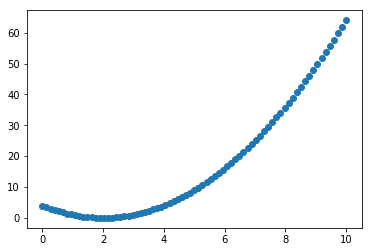

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def parabola(start,stop,num):
    """
    parabola method takes atrributes for a np.linspace array (start, stop, and number of values) 
    and executes array based on parameters. This array serves as the x-values of a parabolic relationship.
    The x-array discards all negative values.
    Using the created x-array, a y-value array is created to return the function (X-2)^2, 
    which results in a parbolic plot with the vertex at X=2. 
    These arrays are then plotted in scatter plot form using MatPlot. 
    Assertion method employed to indicate whether shape is equal, therefore 
    indicating that graphed Y-values are equal in length to X.
    """
    
    #Define X Values
    if int(start) <0: #creating minimum x-value of 0
        start =0
    else:
        start = start

    data_x = np.linspace(start,stop,num)[:, np.newaxis] #creating x-array based on set and transformed parameters
    
    
    #Define Y Values
    data_y = np.power(((data_x)-2),2) #x-array input in y function to create y-array
    
    #Plot
    plt.scatter(data_x, data_y) #arrays are plotted against each other for visualization
    
    #Assert
    assert (data_x.shape == data_y.shape),"Shape Not Equal" #AssertionError to be raised if data shapes are not equal


#Test
parabola(-10, 10.0, 75)